#### Regression Problem:- Determine the price of the automobile given the following features

1. symboling: -3, -2, -1, 0, 1, 2, 3
(Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), 
this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A 
value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.)
2. make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes- benz, 
mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, 
volvo
3. fuel-type: diesel, gas.
4. aspiration: std, turbo.
5. num-of-doors: four, two.
6. body-style: hardtop, wagon, sedan, hatchback, convertible.
7. drive-wheels: 4wd, fwd, rwd.
8. engine-location: front, rear.
9. wheel-base: continuous from 86.6 120.9.
10. length: continuous from 141.1 to 208.1. 11 
width: continuous from 60.3 to 72.3.
12. height: continuous from 47.8 to 59.8.
13. curb-weight: continuous from 1488 to 4066.
14. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
15. num-of-cylinders: eight, five, four, six, three, twelve, two.
16. engine-size: continuous from 61 to 326.
17. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
18. bore: continuous from 2.54 to 3.94.
19. stroke: continuous from 2.07 to 4.17.
20. compression-ratio: continuous from 7 to 23.
21. horsepower: continuous from 48 to 288.
22. peak-rpm: continuous from 4150 to 6600.
23. city-mpg: continuous from 13 to 49.
24. highway-mpg: continuous from 16 to 54.
25. price: continuous from 5118 to 45400

In [1]:
# Importing the important libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
%matplotlib inline


In [2]:
# Loading the dataset

df = pd.read_csv("AutoData (1).csv")
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Renaming the columns according to their meaning
df.columns = ['risk_factor', 'company', 'fuel_type', 'aspiration', 'no_of_doors', 'body_style',
       'drive_wheel', 'engine_location', 'wheel_base', 'car_length', 'car_width',
       'car_height', 'curb_weight', 'engine_type', 'cylinder_number', 'engine_size',
       'fuel_system', 'bore_ratio', 'stroke', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'Price']

In [4]:
# Seperating the independent and depenndent features

X = df.drop("Price" , axis = 1) # Independent features
y = df["Price"] # dependent features

In [5]:
# First Converting the Risk Factor from -3 , -2, -1, 1, 2, 3 to 1,2,3,4,5,6 
# thus adding 3 to all the value in the risk_factor
X["risk_factor"] = X["risk_factor"] + 3

In [6]:
# This shows it is a very small dataset with only 205 rows but it has more numbers of features as 
# compared to the number of rows

X.shape

(205, 24)

In [7]:
# Checking for the null values in the dataset and datatypes

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   risk_factor        205 non-null    int64  
 1   company            205 non-null    object 
 2   fuel_type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   no_of_doors        205 non-null    object 
 5   body_style         205 non-null    object 
 6   drive_wheel        205 non-null    object 
 7   engine_location    205 non-null    object 
 8   wheel_base         205 non-null    float64
 9   car_length         205 non-null    float64
 10  car_width          205 non-null    float64
 11  car_height         205 non-null    float64
 12  curb_weight        205 non-null    int64  
 13  engine_type        205 non-null    object 
 14  cylinder_number    205 non-null    object 
 15  engine_size        205 non-null    int64  
 16  fuel_system        205 non

In [8]:
X.describe()

,risk_factor,wheel_base,car_length,car_width,car_height,curb_weight,engine_size,bore_ratio,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,3.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,3.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,5.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,6.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


In [9]:
X.shape

(205, 24)

In [10]:
# Seperating the categorical and numerical features

num_cols = [col for col in X.columns if X[col].dtype != "object"]
cat_cols = [col for col in X.columns if col not in num_cols]

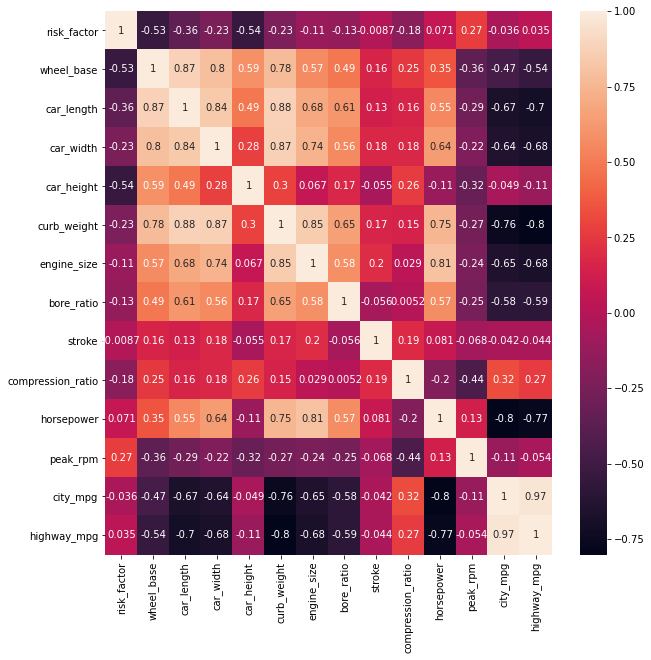

In [11]:
# Checking the correlation between the dataset
X = df.drop("Price" , axis = 1)
cormat = X.corr()
plt.figure(figsize = (10,10))
sns.heatmap(cormat , annot = True)
plt.show()

In [12]:
# Here many columns has correlation more than 85% thus dropping them

drop_feature = set()

for i in range(len(num_cols)):
    for j in range(i):
        col_i = num_cols[i]
        col_j = num_cols[j]
        correlation_value = cormat[col_i][col_j]
        if(correlation_value > 0.85 and correlation_value != 1):
            drop_feature.add(col_j)

drop_feature_list = list(drop_feature)
print(drop_feature_list)

X = X.drop(drop_feature_list , axis = 1)

['car_length', 'wheel_base', 'curb_weight', 'car_width', 'city_mpg']


In [13]:
# Seperating the categorical and numerical features

num_cols = [col for col in X.columns if X[col].dtype != "object"]
cat_cols = [col for col in X.columns if col not in num_cols]

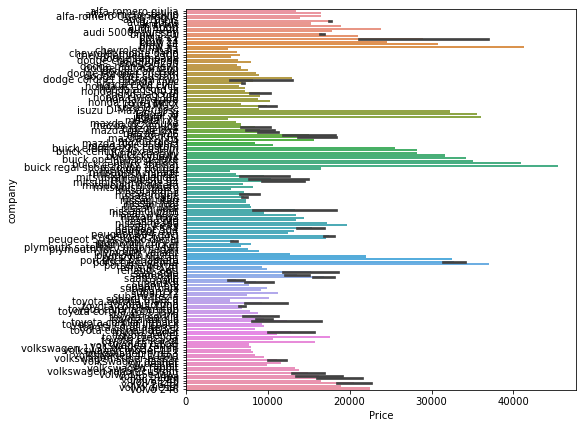

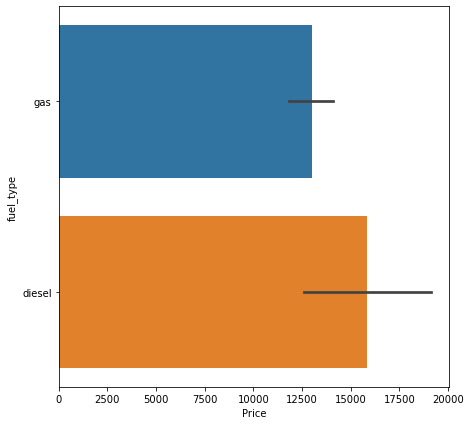

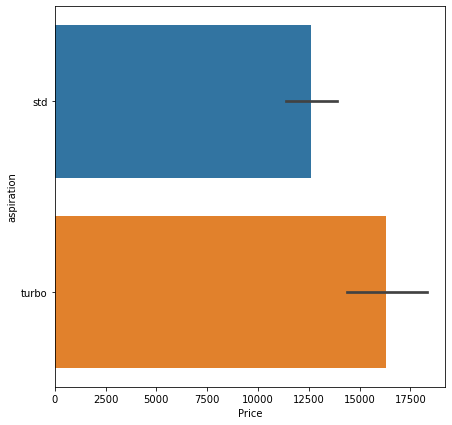

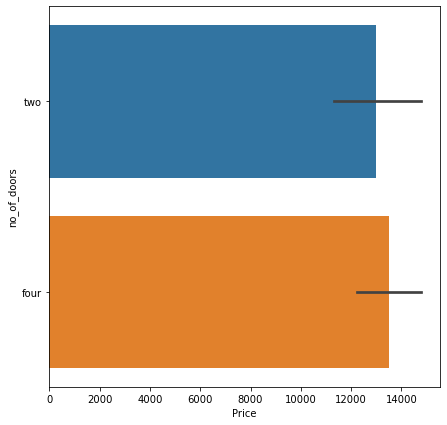

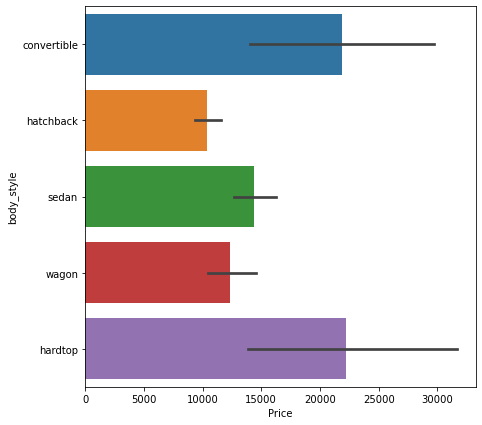

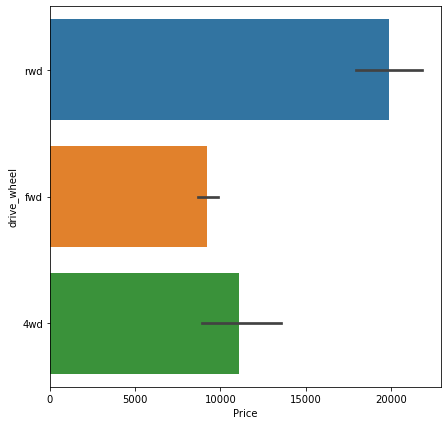

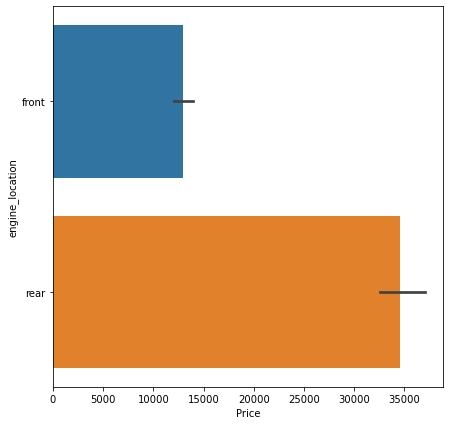

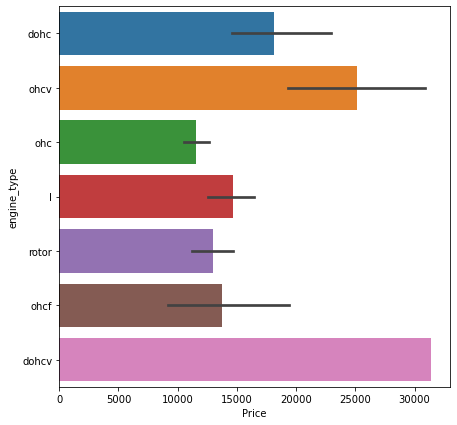

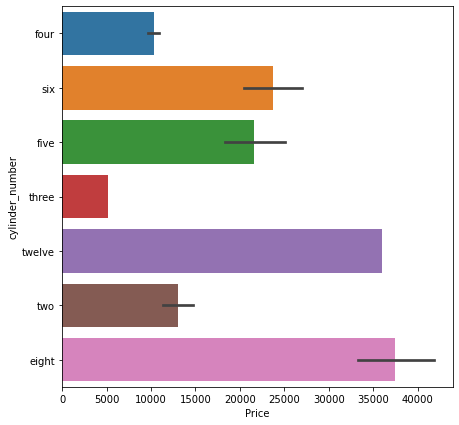

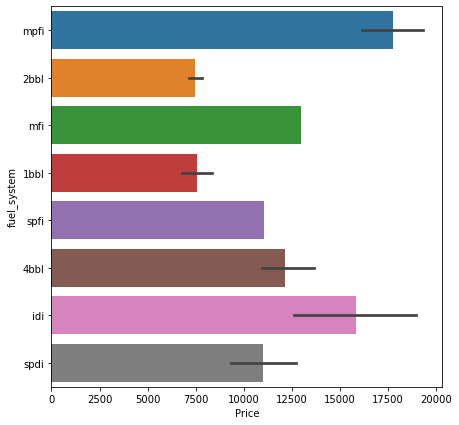

In [14]:
# Looking the relation of the categorical features with the price

for col in cat_cols:
    plt.figure(figsize = (7,7))
    sns.barplot(y = col , x = "Price" , data = df)
    plt.show()

#### Here some of the feature are seems to be important such as

1. aspiration
2. drive_wheel
3. engine_location
4. cylinder_number
5. body_style

In [15]:
linear_model = LinearRegression()

In [16]:
# code for knowing which categorical_column gives highest accuracy 
# when we use it in simple linear regression

for col in cat_cols:
    temp = df[[col,"Price"]]
    X_simple = temp.iloc[:,:-1]
    y = temp.iloc[:,-1]
    
    X_simple = pd.get_dummies(data = X_simple , drop_first=True)
    X_train,X_test,y_train,y_test = train_test_split(X_simple,y,test_size=0.2,random_state = 42)
    
    linear_model.fit(X_train,y_train)
    pred_y = linear_model.predict(X_train)
    predicted_price = linear_model.predict(X_test)
    print("{} has accuracy of {}".format(col,linear_model.score(X_test,y_test)))


company has accuracy of -3.9940803979108296e+27
fuel_type has accuracy of 0.02468291528886224
aspiration has accuracy of 0.05291467769067826
no_of_doors has accuracy of -9.509361255921611e-05
body_style has accuracy of -0.032947336435442676
drive_wheel has accuracy of 0.4286784688106732
engine_location has accuracy of -0.005575831443179524
engine_type has accuracy of 0.056787579844998604
cylinder_number has accuracy of 0.4026317088805992
fuel_system has accuracy of 0.28472820207965366


#### Conclusion
- Writing important features in descending order
1. drive_wheel
2. cylinder_number
3. fuel_system
4. engine_type
5. aspiration

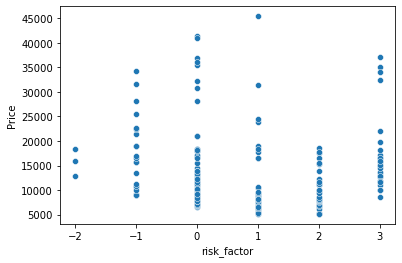

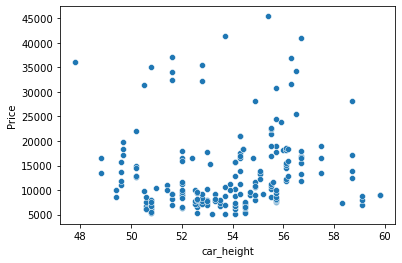

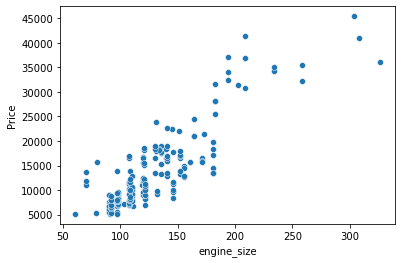

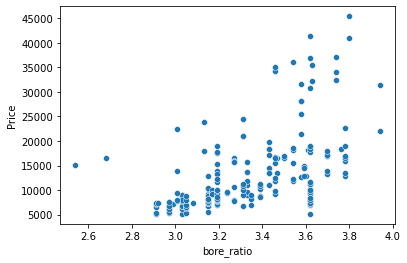

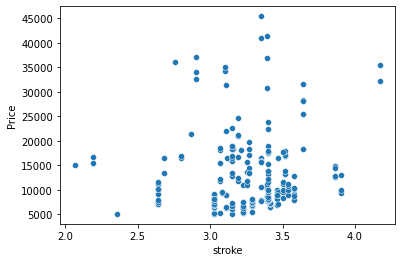

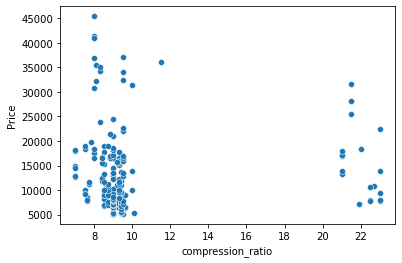

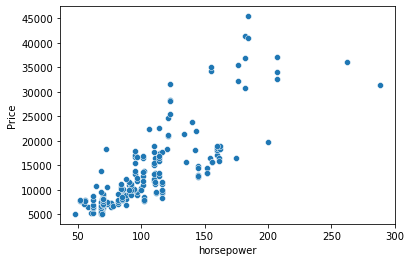

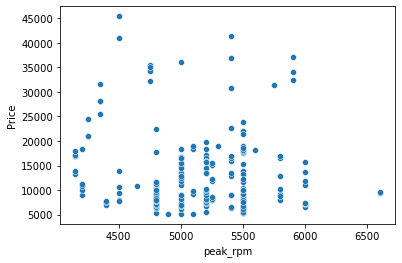

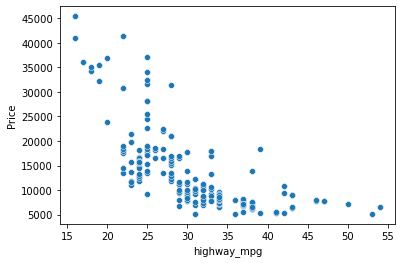

In [17]:
# Looking the relation of the numerical features with the price

for col in num_cols:
    sns.scatterplot(x = col , y = "Price" , data = df)
    plt.show()

#### Some important features
1. engine_size
2. bore_ratio
3. horepower
4. highway_mpg

risk_factor has accuracy of 0.002167997261079191


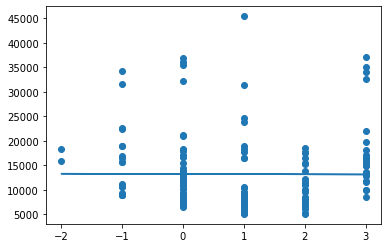

car_height has accuracy of 0.02666318813473134


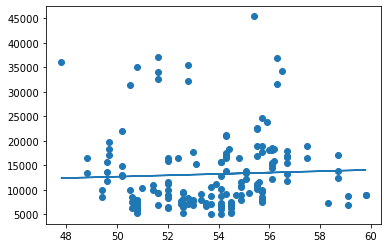

engine_size has accuracy of 0.8040958796678975


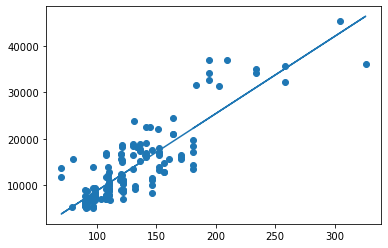

bore_ratio has accuracy of 0.3266609622083756


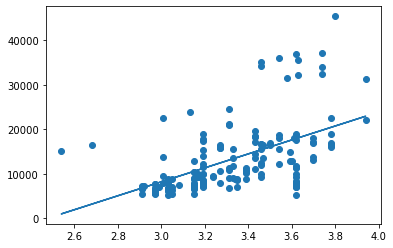

stroke has accuracy of 0.009897076301570107


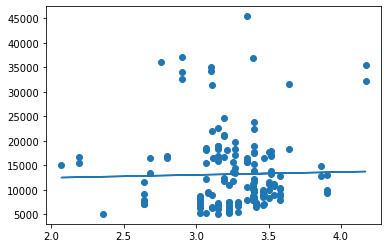

compression_ratio has accuracy of 0.009643064040025018


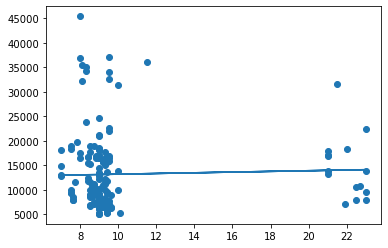

horsepower has accuracy of 0.6326129716904236


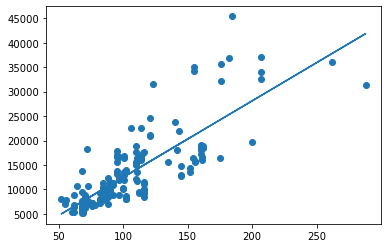

peak_rpm has accuracy of 0.012085666483712232


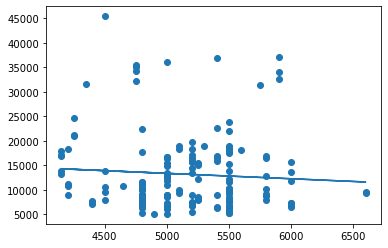

highway_mpg has accuracy of 0.4084183180596913


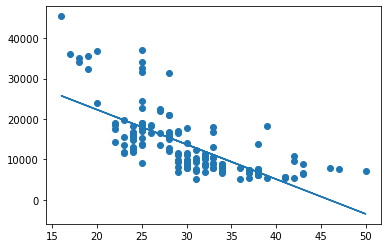

In [18]:
# code for knowing which column gives highest accuracy when we use it in simple linear regression

for col in num_cols:
    temp = df[[col,"Price"]]
    X_simple = temp.iloc[:,:-1]
    y = temp.iloc[:,-1]
    
    X_train,X_test,y_train,y_test = train_test_split(X_simple,y,test_size=0.2,random_state = 42) 
    
    linear_model.fit(X_train,y_train)
    pred_y = linear_model.predict(X_train)
    predicted_price = linear_model.predict(X_test)
    
    print("{} has accuracy of {}".format(col,linear_model.score(X_test,y_test)))
    fig,ax = plt.subplots()
    ax.scatter(X_train,y_train)
    ax.plot(X_train,pred_y)
    plt.show()


#### Conclusion
- Writing important features in descending order
1. engine_size 
2. horepower 
3. highway_mpg 
4. bore_ratio 
5. car_height

### Now performing different_model and checking the accuracy 

In [19]:
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
gd_model = GradientBoostingRegressor()
lin_model = LinearRegression()


In [20]:
# Now trying decision tree , random forest , gradient boosting


X = df.drop("Price" , axis = 1)
y = df["Price"]

X = X.drop(drop_feature_list , axis = 1)

X = pd.get_dummies(data = X , drop_first = True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size = 0.2)

lin_model.fit(X_train,y_train)
lin_pred = lin_model.predict(X_test)

dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)

rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)

gd_model.fit(X_train,y_train)
gd_pred = gd_model.predict(X_test)


print("Linear Regresion")
print("Accuracy {}".format(lin_model.score(X_test,y_test)))
print("RMSE {}".format(np.sqrt(mean_squared_error(y_test,lin_pred))))
print()

print("Decision Tree Regresion")
print("Accuracy {}".format(dt_model.score(X_test,y_test)))
print("RMSE {}".format(np.sqrt(mean_squared_error(y_test,dt_pred))))
print()

print("Random Forest Regresion")
print("Accuracy {}".format(rf_model.score(X_test,y_test)))
print("RMSE {}".format(np.sqrt(mean_squared_error(y_test,rf_pred))))
print()

print("Gradinet Boost Regresion")
print("Accuracy {}".format(gd_model.score(X_test,y_test)))
print("RMSE {}".format(np.sqrt(mean_squared_error(y_test,gd_pred))))



Linear Regresion
Accuracy 0.6477957057375618
RMSE 5272.989963972909

Decision Tree Regresion
Accuracy 0.8933691178214567
RMSE 2901.3566807821553

Random Forest Regresion
Accuracy 0.9443308516256766
RMSE 2096.3650473176995

Gradinet Boost Regresion
Accuracy 0.9251352981577065
RMSE 2431.073957202324


#### Conclusion
- Here RandomForestRegressor performs very well with the default parameters

### Now performing feature selection and then performing the modeling
1. Finding the best 5 features from the num_cols
2. Finding the best 5 features from the cat_cols
3. Combining both the best features and then fitting data with the top 10 features

In [21]:
X = df.drop("Price" , axis = 1)
X = X.drop(drop_feature_list , axis = 1)
y = df["Price"]
X.shape

(205, 19)

In [22]:
# calling the linear regression model

X = df.drop("Price" , axis = 1)
X = X[num_cols]
y = df["Price"]

lin_model = LinearRegression()
sfs1 = sfs(lin_model, k_features=5, forward=True, verbose=2, scoring='neg_mean_squared_error')

sfs1 = sfs1.fit(X, y)

best_num_features = list(sfs1.k_feature_names_)
print(best_num_features)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2021-08-20 14:25:50] Features: 1/5 -- score: -16755873.365080947[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2021-08-20 14:25:51] Features: 2/5 -- score: -15395771.159169072[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


['engine_size', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm']


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2021-08-20 14:25:51] Features: 3/5 -- score: -14813151.934068214[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2021-08-20 14:25:51] Features: 4/5 -- score: -14056809.403858382[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2021-08-20 14:25:51] Features: 5/5 -- score: -13557417.825649103

In [23]:
# Now we are doing same with the categorical variables
X = df.drop("Price" , axis = 1)
X = X[cat_cols]
y = df["Price"]

X = pd.get_dummies(data = X,drop_first=True)


# importing the models

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

# calling the linear regression model

lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=5, forward=True, verbose=2, scoring='neg_mean_squared_error')

sfs1 = sfs1.fit(X, y)

best_cat_features = list(sfs1.k_feature_names_)
print(best_cat_features)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    1.7s finished

[2021-08-20 14:25:53] Features: 1/5 -- score: -36676576.010168895[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 174 out of 174 | elapsed:    1.6s finished

[2021-08-20 14:25:55] Features: 2/5 -- score: -26689151.741064318[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 173 out of 173 | elapsed:    1.8s finished

[2021-08-20 14:25:57] Features: 3/5 -- score: -25655750.60129105[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

['company_toyota corolla liftback', 'aspiration_turbo', 'body_style_hatchback', 'drive_wheel_rwd', 'cylinder_number_four']


[Parallel(n_jobs=1)]: Done 171 out of 171 | elapsed:    1.6s finished

[2021-08-20 14:26:00] Features: 5/5 -- score: -24015262.434029464

### I have already tried directly finding the top 10 features and then do modeling but performs slightly less than this approach

In [24]:
imp_features = best_num_features + best_cat_features
print(imp_features)

['engine_size', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'company_toyota corolla liftback', 'aspiration_turbo', 'body_style_hatchback', 'drive_wheel_rwd', 'cylinder_number_four']


In [25]:
# Modeling using the imp_features


X = df.drop("Price" , axis = 1)
y = df["Price"] 


X = pd.get_dummies(data = X , drop_first = True)
X = X[imp_features]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size = 0.2)

lin_model.fit(X_train,y_train)
lin_pred = lin_model.predict(X_test)

dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)

rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)

gd_model.fit(X_train,y_train)
gd_pred = gd_model.predict(X_test)

print("Linear Regresion")
print("Accuracy {}".format(lin_model.score(X_test,y_test)))
print("RMSE {}".format(np.sqrt(mean_squared_error(y_test,lin_pred))))
print()

print("Decision Tree Regresion")
print("Accuracy {}".format(dt_model.score(X_test,y_test)))
print("RMSE {}".format(np.sqrt(mean_squared_error(y_test,dt_pred))))
print()

print("Random Forest Regresion")
print("Accuracy {}".format(rf_model.score(X_test,y_test)))
print("RMSE {}".format(np.sqrt(mean_squared_error(y_test,rf_pred))))
print()

print("Gradinet Boost Regresion")
print("Accuracy {}".format(gd_model.score(X_test,y_test)))
print("RMSE {}".format(np.sqrt(mean_squared_error(y_test,gd_pred))))


Linear Regresion
Accuracy 0.8727583077825307
RMSE 3169.3801929050537

Decision Tree Regresion
Accuracy 0.9306954348259496
RMSE 2339.055587230844

Random Forest Regresion
Accuracy 0.9412130998422644
RMSE 2154.26884893753

Gradinet Boost Regresion
Accuracy 0.9207606982364183
RMSE 2501.093579399557


In [26]:
rf_model = RandomForestRegressor(n_estimators=150)
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Regresion")
print("Accuracy {}".format(rf_model.score(X_test,y_test)))
print("RMSE {}".format(np.sqrt(mean_squared_error(y_test,rf_pred))))
print()



Random Forest Regresion
Accuracy 0.9404690292893475
RMSE 2167.859357700134



In [27]:
# Performing Cross Validation on the Random Forest

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model

rf_model = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [28]:
rf_model = RandomForestRegressor(bootstrap=  True,
 max_depth =  90,
 max_features =  3,
 min_samples_leaf =  3,
 min_samples_split =  8,
     n_estimators =  1000,)
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Regresion")
print("Accuracy {}".format(rf_model.score(X_test,y_test)))
print("RMSE {}".format(np.sqrt(mean_squared_error(y_test,rf_pred))))
print()

# print("rf_model acc {} and rmse of {}".format(rf_model.score(X_test,y_test),np.sqrt(mean_squared_error(y_test,rf_pred))))


Random Forest Regresion
Accuracy 0.9190101911120478
RMSE 2528.5689952797366



### Conclusion
1. Here when performing the scaling and handling outliers reduces the accuracy of the model
2. When we use all the features other than the most correlated feature Random Forest Regressor performs very well
- Random Forest Regresion
- RMSE 2023.271751084294
- Accuracy / R2_Score 0.9481451725777177
3. After doing feature selection using the forward feature selection we found 5 features from numerical features and 5 features from the categorical features
- 'engine_size',
- 'stroke',
- 'compression_ratio',
- 'horsepower',
- 'peak_rpm',
- 'company_toyota corolla ftback',
- 'aspiration_turbo',
- 'body_style_hatchback',
- 'drive_wheel_rwd',
- 'cylinder_number_four'
4. The performance after feature selection is 
- Random Forest Regresion
- RMSE 2142.098453755861
- Accuracy / R2_Score 0.9418754487742891